<font size=+2 color="indigo"><center><b>КЕЙС</b></center></font>

<font size=+2 color="indigo"><center><b> Твиты о COVID19.  Аналих настроения пользователей. </b></center></font>

#### Источник: https://www.kaggle.com/datvuthanh/covid19-tweets-ai-club/notebook

![](https://pbs.twimg.com/profile_images/1308010958862905345/-SGZioPb_400x400.jpg)

# Введение

### У нас имеются данные по твитам о короновирусе (подробнее о данных ниже) в различных страннах. Это такие страны, как Индия, США, Великобритания, Швецария, Ирландия, Сингапур и т.д. Данные включают в себя - никнейм пользователя опубликовавшего твит, количество подписчиков у пользователя, текст твита, дата публикации твита, название приложения с которого был сделан твит, место откуда был сделан твит(страна, город) и многое другое. Всего в таблице присутствует 14 столбцов и около 180 тысяч строк. Количество авторов твитов больше 90 тысяч. 

### **Задача состоит в следующем:** определить настроение человека по анализу текста твита

### Наши данные по твитам о короновирусе не размечены (то есть, заранее не известно, какое настроение было у пользователя). Однако, есть специальный датасет, на котором мы и будем обучать модель. Специальный датасет содержит более 1,5 миллиона строк, с текстом твитов. Особенность данного датасета в том, что он размечен (заранее известно, какое настроение у пользователя опубликовавшего твит).

### Таким образом, сначала мы обучим модель на специальном датасете, а затем попытаемся сделать прогноз для наших данных. 

###  **Основная повестка дня:**

### *  Данные
### *  Анализ твитов (Визуализация, N-граммы, и т.д.) 
### *  Моделирование и прогнозы - Анализ Настроений
### *  Визуализации после прогнозов


<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Структура кейса</h3>

* [1. Библиотеки](#1)
* [2. Данные](#2)
* [3. Местоположение пользователей](#3)
* [4. Серия твитов](#4)
* [5. Источник твита](#5)
* [6. Хэштег](#6)
* [7. Упоминания](#7)
* [8. Средняя длина](#8)  
* [9. Используемые слова](#9)
* [10. N-граммы](#10)
* [11. Моделирование](#11)
* [12. Prediction](#12)
* [13. Angry Bird vs Happy Bird](#13)
* [14. Sentiment length](#14)
* [15. World Emotions](#15)
* [16. Top Countries - Emotional Bird](#16)
* [17. Expand sentiment classes](#17)
* [18. Vietnamese sentiment analysis](#18)

<a id="1"></a>
    
<font size="+2" color="indigo"><b>1. Библиотеки</b></font><br>

#### Устанавливаем необходимые библиотеки - Numpy,Ploltly,Sklearn,NLTK,Tensorflow

In [1]:
import numpy as np 
import pandas as pd # Библиотека для обработки данных в виде таблиц
import os # Библиотека для взаимодействия с системой 
import itertools

#plots
import matplotlib.pyplot as plt # Библиотека для визуализации данных
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from PIL import Image
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from nltk.util import ngrams # Библиотека необходима для разбиение слов на N-grams


from sklearn import preprocessing
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split

import re # Библиотека для регулярных выражений
from collections import Counter

import tensorflow as tf # Специализированнная библиотека на нейросетях
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords

import requests # Данная библиотека помогает подключаться к WEB-страницам
import json # Данная библиотека помогает взаимодействовать со специальным форматом
                                                             # для передачи данных 

<a id="2"></a>
<font size="+2" color="indigo"><b>2. Данные</b></font><br>

Всего использовано два датасета

1.1) Данные для анализа доступны по следующей ссылке [Gabriel dataset]   (https://www.kaggle.com/gpreda/covid19-tweets). Этот датасет представляет собой твиты по короновирусы

1.2) Следующие данные необходимы для обучения модели [Kazanova dataset](https://www.kaggle.com/kazanova/sentiment140), размер данных - присутствует 1,6 миллионов твитов, каждый твит размечен по эмоциям от 0 до 4 (0 - негативные эмоции, 4 - позитивные эмоции). В данном случае мы переименуем данные следующим образом ( 0 - 0; 4 - 1).

2) Таким образом, после обучения модели на данных[Kazanova dataset], мы сможем дать прогноз по данным [Gabriel dataset], следовательно, поймём какие эмоции выражает человек (пользователь твитера), который написал этот твит  

3) Эмоции размечены следующим образом:

**Положительные эмоции** - Надежда, Гордость, Интерес, Радость, Удовлетворение, Счастье и т.д.
**Отрицательные эмоции** - Страх, Гнев, Отвращение, Грусть, Грубость и т.д.

####  Начинаем загружать данные

In [10]:
# Загружаем твиты по covid
covid=pd.read_csv('covid19_tweets.csv')

# Строку ниже пока закомментирую, достаточно большой объём данных
# sentiment=pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv',encoding = 'latin',header=None,names=['target','id',
                                                                                                                             #'time','query','usr','text'])
# Код ниже необходим для прорисовки стран на карте - Plotly Chlorepeth MAP
country_code=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv') 

# Данные по странам хранятся в формате json, следовательно, необходимо их преобразовать и получить
# данные по городам, странам и тому подобное.
state = json.loads(requests.get("https://raw.githubusercontent.com/praneshsaminathan/country-state-city/master/states.json").text)
country=json.loads(requests.get("https://raw.githubusercontent.com/praneshsaminathan/country-state-city/master/countries.json").text)
city=json.loads(requests.get("https://raw.githubusercontent.com/praneshsaminathan/country-state-city/master/cities.json").text)
us_state_code=pd.read_csv('https://worldpopulationreview.com/static/states/abbr-name.csv',names=['state_code','state'])


# Все вышеперечисленные данные функционируют и извлекаются в нижеприведенном файле, 
#чтобы получить действительное название страны - without_country_name
#without_country_name=ПД.read_csv('../ввод/страна-твит/without_country_name.файл CSV',low_memory=ложь)

without_country_name = pd.DataFrame([state,country,city])

#Выведем шапку таблицу, для отображения данных
covid.head(5)

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

Примерно, понятно, какие данные присутствуют в таблице. Давайте подробно рассмотрим, какие данные в колонке "Text" 

In [14]:
covid["text"][2] #Возьмём рандомный твит. Присутсивует даже ссылка на твит.

'@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3'

In [15]:
print('Общее количество твитов: {}'.format(covid.shape[0]))
print('Общее количество уникальных пользователей: {}'.format(covid['user_name'].nunique()) )

Общее количество твитов: 179108
Общее количество уникальных пользователей: 92276


<a id="3"></a>
<font size="+2" color="indigo"><b>3. Местоположение пользователей</b></font><br>

Выделим местоположение(страны, города  и т.д.) пользователей, которые писали твиты про ковид.

Данные зашумлены, необходимо их первоначально обработать. 

(Given that the location fields is  a mixture and noisy.I have done some data cleaning and fitted data into 'without_country_name.csv')

In [16]:
covid['country_name']=covid['user_location'].str.split(',').str[-1]
covid['only_date']=pd.to_datetime(covid['date']).dt.date

#Обрабатываем страны название которых присутствует в файле country_code. Это лёгкая задача

with_country_name=covid[covid['country_name'].isin(list(country_code['COUNTRY']))]
with_country_name['filtered_name']=covid['country_name']

#Однако есть страны у которых название отсутствует в файле country_code. Это задача
# требует написание большого блока кода


C:\Users\ratmi\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Пока что не будем код ниже

In [5]:
# country=pd.DataFrame(country['countries'])
# states =pd.DataFrame(state['states'])
# city=pd.DataFrame(city['cities'])

# all_world=pd.merge(city,states,left_on="state_id",right_on="id",how="left")
# all_world=pd.merge(all_world,country,left_on="country_id",right_on="id",how="left")
# all_world=pd.merge(all_world,us_state_code,left_on="name_y",right_on="state",how="left")

# temp_df=all_world[['name_x','name']].rename(columns={'name_x':'place'})
# temp_df=temp_df.append(all_world[['name_y','name']].rename(columns={'name_y':'place'}))
# temp_df=temp_df.append(all_world[['sortname','name']].rename(columns={'sortname':'place'}))
# temp_df=temp_df.append(all_world[['state_code','name']].rename(columns={'state_code':'place'}))
# temp_df=temp_df.drop_duplicates()
# temp_df.shape


# dict_count=dict({'USA':'United States','UK':'United Kingdom','भारत':'India','British Columbia':'Canada','Deutschland':'Germany','Jammu And Kashmir':'India',
#                  'ON':'Canada','DC':'United States','UAE':'United Arab Emirates','hyderabad':'India','New York City':'United States','Everywhere':'United States',
#                  'Republic of the Philippines':'Philippines','Africa':'South Africa','WORLDWIDE':'United States','Washington DC':'United States','mumbai':'India',
#                  'INDIA':'India','Worldwide':'United States','North America':'United States','Washington DC & Virginia':'United States','PRC':'China',
#                  'San Francisco Bay Area':'United States','America':'United States','BC':'United Kingdom','BENGALURU':'India','#AFRICA #MENA':'South Africa',
#                  'online':'India','Québec':'Canada','Earth':'United States','Canberra':'Australia','Europe':'Canada','World':'India','Northern Ireland':'United Kingdom',
#                  'Sun Valley Idaho':'United States','Hong Kong':'China','Sydney':'Australia','NYC':'United States','New South Wales':'Australia','D.C.':'United States','The Netherlands':'Netherlands','Global':'United States','Planet Earth':'India','Bangalore':'India','U.S.':'United States',
#                  'CANADA':'Canada','Nig':'Nigeria','Western Australia':'Australia','The seventh house':'United States','Ngovhela Mahunguni':'Russia','Kashmir':'India','Etats-Unis':'United States','Mumbai | Kolkata':'India','VadaChennai':'India','SoCal':'United States','Sverige':'Sweden','Victoria BC':'Canada','Kingdom of Saudi Arabia':'Saudi Arabia','worldwide':'United States','Koramangala':'India','East Legon':'Ghana','india':'India','Silicon Valley':'United States','BHARAT':'India','Melbourne but I tour worldwide':'Australia','Remote':'United States','New Delhi.':'India','Cape Town':'South Africa','Nigeria.':'Nigeria','Netherlands':'Netherlands','Kamloops':'Canada','EU Citizen':'Canada','SF Bay Area':'United States','South Florida':'United States','Nova Scotia':'Canada','AB':'Canada','City of London':'United Kingdom','NOIDA':'India','NEW DELHI':'India','Lancashire and Europe':'United Kingdom','Washington D.C.':'United States','Middle East':'Saudi Arabia','Quezon City':'Philippines','@CapricornFMNews':'Russia','South Australia':'Australia','India.':'India','International':'United States','Kashmir & Ladakh':'India','WorldWide':'India','Ca':'united states','MontrÃ©al':'Canada','Asia':'India','CHINA':'China','World Wide':'India','Northern California':'United States','uk':'United Kingdom','Kuala Lumpur':'Singapore','Global Citizen':'United States','Johannesburg South Africa':'South Africa','J&K':'India','Australia ðŸ‡¦ðŸ‡º':'Australia','Abuja':'Nigeria','Makati City':'Philippines','Detroit-Northville-St. Heights':'United States','South Africa- Gauteng':'South Africa','Southern California':'United States','EspaÃ±a':'Spain',
#                  'California USA ðŸ‡ºðŸ‡¸':'United States','United States of America':'United States','West of Minsk':'Belarus',
#                  'Ontario Canada':'Canada','Greater Vancouver':'Canada','Chicago/Washington D.C.':'United States','California USA 🇺🇸':'United States','U.S.A.':'United States','Macau S.A.R.':'China','MontrÃ©al':'Spain','EspaÃ±a':'Spain','Montserrat':'United Kingdom','California USA ðŸ‡ºðŸ‡¸':'United States','TÃ¼rkiye':'Turkey','united states':'United States','Australia ðŸ‡¦ðŸ‡º':'Australia','Islamabad':'Pakistan',
#                 'Netherlands The':'Netherlands','Australia 🇦🇺':'Australia' ,'Montréal':'Canada','España':'Spain','Türkiye':'Türkey','East of England':'United Kingdom','NY USA':'United States','Waikato New Zealand':'New Zealand','Mexico City':'Mexico','West Yorkshire':'United Kingdom','NIGERIA':'Nigeria','London UK':'United Kingdom','Ngunnawal Country Aka Canberra':'Australia','Blackburn with Darwen':'United Kingdom','JHB':'South Africa','New England':'United Kingdom','UK.':'United Kingdom','Odisha(India)':'India','london':'United Kingdom','B.C.':'United Kingdom','Mysore and BERLIN':'India','Appalachia':'United States','Philly':'United States','criminal australia':'Australia','EU':'Spain','New York Metropolitan Area':'United States','U.K.':'United States','Islamic Republic of Iran':'Iran','Yorkshire and The Humber':'United Kingdom',
#                  'Northwest Indiana':'Indiana','Kenya.':'Kenya','Nairobi Kenya':'Kenya','Abu Dhabi':'Saudi Arabia'})

# #dict_count.keys()
# dict_country= pd.DataFrame(dict_count.items(), columns=['mislabel', 'correct_label'])
# # dict_country['mislabel']=dict_count.keys()
# # dict_country['correct_label']=dict_count.values()


# def manual_fix(cnt):
#     if cnt in list(dict_country['mislabel']):
#         return dict_country[dict_country['mislabel']==cnt]['correct_label'].to_string().split("  ")[-1]  
#     else:
#         return cnt


# def get_country(x):
#     if type(x) is str:
#         x = x.replace('\D+', '')
#         print(x)
#         if(len(temp_df[temp_df['place']==x.strip()]['name'])>0):
#             return temp_df[temp_df['place']==x.strip()]['name'][:1].to_string().split('  ')[-1]
#         else:
#             return manual_fix(x.strip())
#     else:
#         return x

# without_country_name['filtered_name']=covid['country_name'].apply(lambda x:get_country(x))
# without_country_name.to_csv('without_country_name.csv',index=False)

Теперь, давайте посмотрим на обработанные данные

In [17]:
tweet_df=with_country_name.append(without_country_name)
tweet_state_count=tweet_df['filtered_name'].value_counts().to_frame().reset_index().rename(columns={'index':'country','filtered_name':'count'})
all_tweet_location=pd.merge(tweet_state_count,country_code[['COUNTRY','CODE']],left_on="country",right_on="COUNTRY",how="left")
all_tweet_location=all_tweet_location[all_tweet_location['COUNTRY'].notnull()]
all_tweet_location[['COUNTRY','count']].head(5)

COUNTRY  count
0           India   3876
1   United States   2455
2  United Kingdom   1210
3       Australia    966
4          Canada    846

#### Давайте отобразим топ стран по количеству твитов

In [23]:
fig = go.Figure(go.Bar(
    x=all_tweet_location['COUNTRY'][:10],y=all_tweet_location['count'][:10],
    marker={'color': all_tweet_location['count'][:10], 
    'colorscale': 'blues'},  
    text=all_tweet_location['count'][:10], # Отображаем топ 10 стран
    textposition = "outside",
))
fig.update_layout(title_text='Top Countries with most tweets',xaxis_title="Countries",
                  yaxis_title="Number of Tweets ",template="plotly_dark",height=700,title_x=0.5)

fig.show()

Как мы видим наибольшое количество твитов сделали пользователи из Индии, потом из США

#### Представим эти же данные только в ином формате

In [25]:
fig = go.Figure(data=go.Choropleth(
    locations = all_tweet_location['CODE'],
    z = all_tweet_location['count'],
    text = all_tweet_location['COUNTRY'],
    colorscale = 'rainbow', 
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = '# of Tweets',
))

fig.update_layout(
    title_text='Tweets over the world - ({} - {}) '.format(covid['only_date'].sort_values()[0].strftime("%d/%m/%Y"),
                                                       covid['only_date'].sort_values().iloc[-1].strftime("%d/%m/%Y")),title_x=0.5,
    geo=dict(
        showframe=True,
        showcoastlines=False,
        
        projection_type='equirectangular',
    )
)


fig.show()

# Карту ниже можно приближать. При удержании левой кнопки мыши можно переходить по карте. 
# При нажатии левой кнопки мыши на любую из стран, отобразится количество твитов сделанных 
# в этой стране

<a id="4"></a>
<font size="+2" color="indigo"><b>4. Серия твитов</b></font><br>

Узнаем, как часто публиковались твиты о ковид (количество твитов в день)

In [29]:
# Преобразуем для этого данные
covid['tweet_date']=pd.to_datetime(covid['date']).dt.date
tweet_date=covid['tweet_date'].value_counts().to_frame().reset_index().rename(columns={'index':'date','tweet_date':'count'})
tweet_date['date']=pd.to_datetime(tweet_date['date'])
tweet_date=tweet_date.sort_values('date',ascending=False)
tweet_date.head(5)

date  count
2  2020-08-30   8375
21 2020-08-29   4077
1  2020-08-22  11555
8  2020-08-18   7500
10 2020-08-17   7500

In [28]:
fig=go.Figure(go.Scatter(x=tweet_date['date'],
                                y=tweet_date['count'],
                               mode='markers+lines',
                               name="Submissions",
                               marker_color='dodgerblue'))

fig.update_layout(
    title_text='Количество твитов в день : ({} - {}) '.format(covid['only_date'].sort_values()[0].strftime("%d/%m/%Y"),
                                                       covid['only_date'].sort_values().iloc[-1].strftime("%d/%m/%Y")),template="plotly_dark",
    title_x=0.5)

fig.show()


Наибольшое количество твитов 25 июля (выходной день)

<a id="5"></a>
<font size="+2" color="indigo"><b>5. Источник твита</b></font><br>

Ответим на следующий вопрос - какое приложение (точнее девайс) использовали пользователи для 
публикации твитов

In [30]:
source_df=covid['source'].value_counts().to_frame().reset_index().rename(columns={'index':'source','source':'count'})[:15]
source_df.head(5)

source  count
0      Twitter Web App  56891
1  Twitter for Android  40179
2   Twitter for iPhone  35472
3            TweetDeck   8543
4       Hootsuite Inc.   7321

In [34]:
fig = go.Figure(go.Bar(
    x=source_df['source'],y=source_df['count'],
    marker={'color': source_df['count'], 
    'colorscale': 'blues'},  
    text=source_df['count'],
    textposition = "outside",
))

fig.update_layout(title_text='Топ приложений ',xaxis_title="Источники",yaxis_title="Количество ",
                  template="plotly_dark",title_x=0.5)
fig.show()


Наибольшое число твитов сделано через веб приложения, а потом уже на втором месте идут специализируемые приложения для андройда и айфона

<a id="6"></a>

<font size="+2" color="indigo"><b>6. Хэштег</b></font><br>

Определим вирусные хэштеги (частота использования у которых наибольшая) 

In [37]:
# НАпишем для этого специальную функцию
def find_hash(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)
covid['hash']=covid['text'].apply(lambda x:find_hash(x))

In [40]:
hastags=list(covid[(covid['hash'].notnull())&(covid['hash']!="")]['hash'])
hastags = [each_string.lower() for each_string in hastags]
hash_df=dict(Counter(hastags))
top_hash_df=pd.DataFrame(list(hash_df.items()),columns = ['word','count']).sort_values('count',ascending=False)[:20]
top_hash_df.head(4)

word  count
0               covid19  45719
2   coronavirus covid19   1367
26  covid19 coronavirus    917
24          coronavirus    878

In [42]:
fig = go.Figure(go.Bar(
    x=top_hash_df['word'],y=top_hash_df['count'],
    marker={'color': top_hash_df['count'], 
    'colorscale': 'blues'},  
    text=top_hash_df['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Топ Трендовых хэштегов',xaxis_title="Xэштег",
                  yaxis_title="Количество тегов ",template="plotly_dark",height=700,title_x=0.5)
fig.show()


Из графика видно, что уверено лидирует хентег - "covid19"

<a id="7"></a>

<font size="+2" color="indigo"><b>7. Упоминания</b></font><br>

Давайте найдем наиболее упоминаемого пользователя или организацию в твитах covid

In [44]:
#  Напишем для этого специальную функцию
def find_at(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
covid['mention']=covid['text'].apply(lambda x:find_at(x))


In [47]:
mentions=list(covid[(covid['mention'].notnull())&(covid['mention']!="")]['mention'])
mentions = [each_string.lower().split() for each_string in mentions]
mentions=list(itertools.chain.from_iterable(mentions))
mention_df=dict(Counter(mentions))
top_mention_df=pd.DataFrame(list(mention_df.items()),columns = ['word','count']).sort_values('count',ascending=False)[:20]
top_mention_df.head(10)

word  count
5    realdonaldtrump   3998
186              who    714
115              gop    470
87          joebiden    420
257            potus    407
166     borisjohnson    397
258          youtube    386
140     narendramodi    356
193              cnn    325
42        whitehouse    290

In [49]:
fig = go.Figure(go.Bar(
    x=top_mention_df['word'],y=top_mention_df['count'],
    marker={'color': top_mention_df['count'], 
    'colorscale': 'blues'},  
    text=top_mention_df['count'],
    textposition = "outside",
))

fig.update_layout(title_text='Топ Трендовых хэштегов ',xaxis_title="Xэштег",
                  yaxis_title="Количество тегов ",template="plotly_dark",height=700,title_x=0.5)
fig.show()


Мы видим, что наиболее часто упоминался президент США - Дональд Трамп (в основном в топ входят, лидеры различных стран) , а так же присутствует несколько организации - ютуб, снн

<a id="8"></a> 
<font size="+2" color="indigo"><b>8. Средняя длина</b></font><br>

Какова средняя длина твита о covid? - Давайте, определим

In [50]:
# Для этого используем специальные функции, в которых находтся регулярные выражения
def remove_tag(string):
    text=re.sub('<.*?>','',string)
    return text
def remove_mention(text):
    line=re.sub(r'@\w+','',text)
    return line
def remove_hash(text):
    line=re.sub(r'#\w+','',text)
    return line

def remove_newline(string):
    text=re.sub('\n','',string)
    return text
def remove_url(string): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',string)
    return text
def remove_number(text):
    line=re.sub(r'[0-9]+','',text)
    return line
def remove_punct(text):
    line = re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','',text)
    #string="".join(line)
    return line
def text_strip(string):
    line=re.sub('\s{2,}', ' ', string.strip())
    return line
def remove_thi_amp_ha_words(string):
    line=re.sub(r'\bamp\b|\bthi\b|\bha\b',' ',string)
    return line

In [51]:
covid['refine_text']=covid['text'].str.lower()
covid['refine_text']=covid['refine_text'].apply(lambda x:remove_tag(str(x)))
covid['refine_text']=covid['refine_text'].apply(lambda x:remove_mention(str(x)))
covid['refine_text']=covid['refine_text'].apply(lambda x:remove_hash(str(x)))
covid['refine_text']=covid['refine_text'].apply(lambda x:remove_newline(x))
covid['refine_text']=covid['refine_text'].apply(lambda x:remove_url(x))
covid['refine_text']=covid['refine_text'].apply(lambda x:remove_number(x))
covid['refine_text']=covid['refine_text'].apply(lambda x:remove_punct(x))
covid['refine_text']=covid['refine_text'].apply(lambda x:remove_thi_amp_ha_words(x))
covid['refine_text']=covid['refine_text'].apply(lambda x:text_strip(x))

covid['text_length']=covid['refine_text'].str.split().map(lambda x: len(x))


In [54]:
fig = go.Figure(data=go.Violin(y=covid['text_length'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='royalblue ', opacity=0.6,
                               x0='Длина твита '))

fig.update_layout(yaxis_zeroline=False,title="Распределение длины текста",template='ggplot2')
fig.show()

Средняя длина твитов лежит  **14** а медиана равнв **15**.А интерквартили лежат между **11 и 18**.Между средним и медианой нет существенной разницы.

<a id="9"></a>

<font size="+2" color="indigo"><b>9. Используемые слова</b></font><br>

Осуществим поиск наиболее часто используемых слов из всей совокупности твитов

Text(0.5, 1.0, 'Самые использованные слова в твитах ')

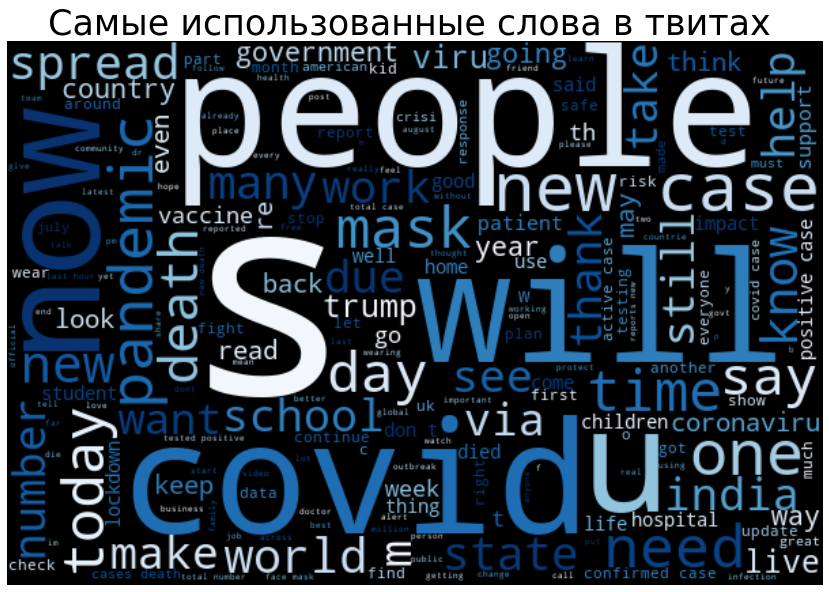

In [60]:
fig, (ax2) = plt.subplots(1,1,figsize=[17, 10])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(covid['refine_text']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Самые использованные слова в твитах ',fontsize=35)


Мы видим, что это слова **people, new, pandemic"**

<a id="10"></a>

<font size="+2" color="indigo"><b>10. N-граммы</b></font><br>

Список ниже верхних N-граммовых последовательных слов, используемых в твитах covid

In [63]:
# Напишем специальную функцию для определения N грамм 
def ngram_df(corpus,nrange,n=None):
    vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df
unigram_df=ngram_df(covid['refine_text'],(1,1),20)
bigram_df=ngram_df(covid['refine_text'],(2,2),20)
trigram_df=ngram_df(covid['refine_text'],(3,3),20)


In [66]:
# Будем искать би - граммы, три- граммы и тому подобное


#Последовательность из двух последовательных элементов часто называют биграмма, последовательность 
#из трёх элементов называется триграмма

fig = make_subplots(
    rows=3, cols=1,subplot_titles=("Unigram","Bigram",'Trigram'),
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]
          ])

fig.add_trace(go.Bar(
    y=unigram_df['text'][::-1],
    x=unigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=unigram_df['count'],
    textposition = "outside",
    orientation="h",
    name="Months",
),row=1,col=1)

fig.add_trace(go.Bar(
    y=bigram_df['text'][::-1],
    x=bigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=bigram_df['count'],
     name="Days",
    textposition = "outside",
    orientation="h",
),row=2,col=1)

fig.add_trace(go.Bar(
    y=trigram_df['text'][::-1],
    x=trigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=trigram_df['count'],
     name="Days",
    orientation="h",
    textposition = "outside",
),row=3,col=1)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Top N Grams',xaxis_title=" ",yaxis_title=" ", showlegend=False,title_x=0.5,
                  height=1200,template="plotly_dark")
fig.show()

* **new,people,pandemic** чаще всего используемые односложные слова.
* **cases death,tested postive and active cases** чаще всего используются биграммы.
* **cases new deaths,help slow spread,slow spread indentity** наиболее часто используются триграммы.

Все наблюдаемые слова предвзяты в сторону выявления covid и приема пациентов.Люди, как правило, очень беспокоятся о других людях вокруг.

<a id="11"></a>

<font size="+2" color="indigo"><b>11. Моделирование</b></font><br>

Будем использовать 40% данных для обучения. Для этого изначально оптимизируем текст, удалив шумные и нежелательные символы, присутствующие в твите.

In [67]:
sentiment=sentiment.sample(int(sentiment.shape[0]*0.4))
sentiment=sentiment[['text','target']]
sentiment['emotion']=np.where(sentiment['target']==0,'negative',np.where(sentiment['target']==2,'neutral',np.where(sentiment['target']==4,'postitive',"none")))
sentiment['target']=np.where(sentiment['target']==4,1,sentiment['target'])

NameError: name 'sentiment' is not defined

In [26]:
# Optimizing text
sentiment['refine_text']=sentiment['text'].str.lower()
sentiment['refine_text']=sentiment['refine_text'].apply(lambda x:remove_tag(str(x)))
sentiment['refine_text']=sentiment['refine_text'].apply(lambda x:remove_mention(str(x)))
sentiment['refine_text']=sentiment['refine_text'].apply(lambda x:remove_hash(str(x)))
sentiment['refine_text']=sentiment['refine_text'].apply(lambda x:remove_newline(x))
sentiment['refine_text']=sentiment['refine_text'].apply(lambda x:remove_url(x))
sentiment['refine_text']=sentiment['refine_text'].apply(lambda x:remove_number(x))
sentiment['refine_text']=sentiment['refine_text'].apply(lambda x:remove_punct(x))
sentiment['refine_text']=sentiment['refine_text'].apply(lambda x:remove_thi_amp_ha_words(x))
sentiment['refine_text']=sentiment['refine_text'].apply(lambda x:text_strip(x))
sentiment['text_length']=sentiment['refine_text'].str.split().map(lambda x: len(x))

# Removing stopwords
stop_words = set(stopwords.words('english'))
sentiment['refine_text'] =  sentiment['refine_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [27]:
# Setting tha randomly
train_data=sentiment[['refine_text','target']]

train_sent=np.array(train_data['refine_text'])
train_label=np.array(train_data['target'])

x_train, x_test, y_train, y_test = train_test_split(train_sent, train_label, test_size=0.20, random_state=42)

### Tuning Parametes (Change below parameters/add or remove layers to get more accurate result)

In [28]:
# Hyper Parameters
vocab_size = 1000
embedding_dim =16 
max_length = 50
trunc_type='post'
oov_tok = "<OOV>"

In [29]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

training_label=y_train
testing_label=y_test

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 16,289
Trainable params: 16,289
Non-trainable params: 0
_________________________________________________________________


In [31]:
num_epochs = 1 # Edit here
history=model.fit(training_padded, training_label, epochs=num_epochs, validation_data=(testing_padded, testing_label))

16000/16000 [==============================] - 50s 3ms/step - loss: 0.5280 - accuracy: 0.7347 - val_loss: 0.5118 - val_accuracy: 0.7448


We have almost hedged our model accuracy with validation accuracy.The model achieved around **75%** accuracy which is not too good or too bad to measure.Still we can tune hyper parameters and produce more good results.

<a id="12"></a>

<font size="+2" color="indigo"><b>12. Prediction</b></font><br>

In [32]:
tweet_df['refine_text']=tweet_df['text'].str.lower()
tweet_df['refine_text']=tweet_df['refine_text'].apply(lambda x:remove_tag(str(x)))
tweet_df['refine_text']=tweet_df['refine_text'].apply(lambda x:remove_mention(str(x)))
tweet_df['refine_text']=tweet_df['refine_text'].apply(lambda x:remove_hash(str(x)))
tweet_df['refine_text']=tweet_df['refine_text'].apply(lambda x:remove_newline(x))
tweet_df['refine_text']=tweet_df['refine_text'].apply(lambda x:remove_url(x))
tweet_df['refine_text']=tweet_df['refine_text'].apply(lambda x:remove_number(x))
tweet_df['refine_text']=tweet_df['refine_text'].apply(lambda x:remove_punct(x))
tweet_df['refine_text']=tweet_df['refine_text'].apply(lambda x:remove_thi_amp_ha_words(x))
tweet_df['refine_text']=tweet_df['refine_text'].apply(lambda x:text_strip(x))
tweet_df['text_length']=tweet_df['refine_text'].str.split().map(lambda x: len(x))

In [33]:
sen = np.array(tweet_df.refine_text)
seq = tokenizer.texts_to_sequences(sen)
padd = pad_sequences(seq, maxlen=max_length, truncating=trunc_type)
result=model.predict(padd)
validated_result=np.where(result>0.5,1,0)

In [34]:
pred_df=pd.DataFrame({'text':tweet_df['refine_text'],'pred_sentiment':list(validated_result),'country':tweet_df['filtered_name'],'text_length':tweet_df['text_length']})
pred_df['pred_sentiment']=np.where(pred_df['pred_sentiment']>0.5,1,0)
pred_df[['text','pred_sentiment']].head(4)

text  pred_sentiment
11                                       order here …               1
30  acknowledges lacks rebuilt homes and a hospita...               0
35  our ceo live with wsu talking about “the effec...               1
50  coronavirus testing fiasco st mirren have pled...               1

Below we will observe the post prediction visualizations.It may differ slightly for every change in models.

<a id="13"></a>

<font size="+2" color="indigo"><b>13. Angry Bird vs Happy Bird</b></font><br>

We will find most frequent used words on Negative tweet & Positive tweet.

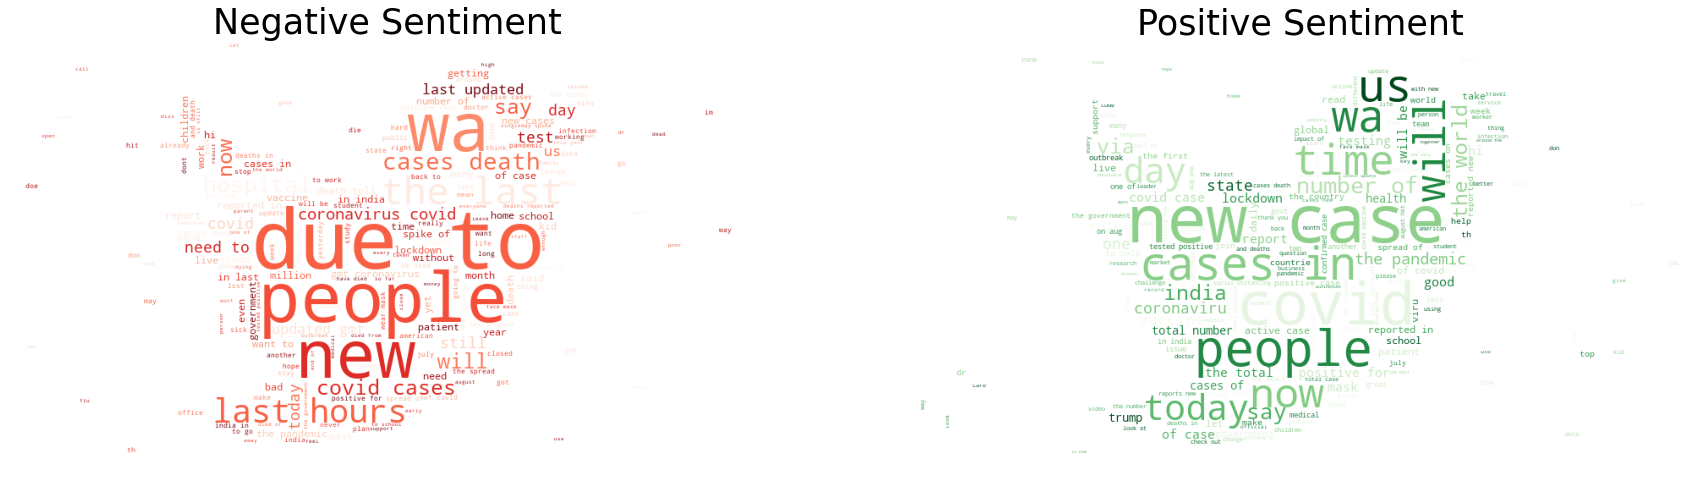

In [35]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://banner2.cleanpng.com/20180723/vvy/kisspng-computer-icons-clip-art-twitter-logo-vector-5b5693f7952128.7797517715324006316109.jpg')
bird = np.array(Image.open(BytesIO(response.content)))

# d = '../input/twitter/'
# bird = np.array(Image.open(d + 'twitter_mask.png'))
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=[30, 15])
wordcloud2 = WordCloud( background_color='white',mask=bird,colormap="Reds",
                        width=600,
                        height=400).generate(" ".join(pred_df[pred_df['pred_sentiment']==0]['text']))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Sentiment',fontsize=35);

wordcloud3 = WordCloud( background_color='white',mask=bird,colormap="Greens",
                        width=600,
                        height=400).generate(" ".join(pred_df[pred_df['pred_sentiment']==1]['text']))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Positive Sentiment',fontsize=35);

<a id="14"></a>
<font size="+2" color="indigo"><b>14. Sentiment length</b></font><br>

In [36]:
print("Average length of Positive Sentiment tweets : {} ".format(round(pred_df[pred_df['pred_sentiment']==1]['text_length'].mean(),2)))
print("Average length of Negative Sentiment tweets : {} ".format(round(pred_df[pred_df['pred_sentiment']==0]['text_length'].mean(),2)))

Average length of Positive Sentiment tweets : 13.08 
Average length of Negative Sentiment tweets : 14.85 


In [37]:
fig = go.Figure()

fig.add_trace(go.Violin(y=pred_df[pred_df['pred_sentiment']==1]['text_length'], box_visible=False, line_color='black',
                               meanline_visible=True, fillcolor='green', opacity=0.6,name="Positive",
                               x0='Positive')
             )

fig.add_trace(go.Violin(y=pred_df[pred_df['pred_sentiment']==0]['text_length'], box_visible=False, line_color='black',
                               meanline_visible=True, fillcolor='red', opacity=0.6,name="Negative",
                               x0='Negative')
             )

fig.update_traces(box_visible=False, meanline_visible=True)
fig.update_layout(title_text="Violin - Tweet Length ",
                  title_x=0.5)

fig.show()


Average words for positive is around 13 whereas for negative is around 15.People tend to type long when they are in negative mode.

<a id="15"></a>
<font size="+2" color="indigo"><b>15. World Emotions</b></font><br>

Let us look at heatmap of positive and negative sentiment of each countries in the world.

In [38]:
all_pos_country=pred_df[pred_df['pred_sentiment']==1]['country'].value_counts().reset_index().rename(columns={'index':'country','country':'count'})

all_pos_country_df=pd.merge(all_pos_country,country_code[['COUNTRY','CODE']],left_on="country",right_on="COUNTRY",how="left")
all_pos_country_df=all_pos_country_df[all_pos_country_df['COUNTRY'].notnull()]

In [39]:
fig = go.Figure(data=go.Choropleth(
    locations = all_pos_country_df['CODE'],
    z = all_pos_country_df['count'],
    text = all_pos_country_df['COUNTRY'],
    colorscale = 'greens', 
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = '# of Tweets ',
))

fig.update_layout(
    title_text='Tweets over the world - ({} - {})'.format(covid['only_date'].sort_values()[0].strftime("%d/%m/%Y"),
                                                       covid['only_date'].sort_values().iloc[-1].strftime("%d/%m/%Y")),title_x=0.5,
    
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='equirectangular',
    )
)

fig.show()


### Positive Sentiment counts

In [40]:
all_pos_country_df[['country','count']][:5]

country  count
0           India   2733
1   United States   1545
2  United Kingdom    786
3       Australia    663
4    South Africa    598

In [41]:
all_neg_country=pred_df[pred_df['pred_sentiment']==0]['country'].value_counts().reset_index().rename(columns={'index':'country','country':'count'})

all_neg_country_df=pd.merge(all_neg_country,country_code[['COUNTRY','CODE']],left_on="country",right_on="COUNTRY",how="left")
all_neg_country_df=all_neg_country_df[all_neg_country_df['COUNTRY'].notnull()]

In [42]:
fig = go.Figure(data=go.Choropleth(
    locations = all_neg_country_df['CODE'],
    z = all_neg_country_df['count'],
    text = all_neg_country_df['COUNTRY'],
    colorscale = 'reds',  
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = '# of Tweets',
))

fig.update_layout(
    title_text='Tweets over the world - ({} - {}) '.format(covid['only_date'].sort_values()[0].strftime("%d/%m/%Y"),
                                covid['only_date'].sort_values().iloc[-1].strftime("%d/%m/%Y")),title_x=0.5,
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='equirectangular',
    )
)

fig.show()


### Negative Sentiment counts

In [43]:
all_neg_country_df[['country','count']][:5]

country  count
0           India   1143
1   United States    910
2  United Kingdom    424
3       Australia    303
4          Canada    302

Comparitive to positive sentiments,negatives are low in numbers.This is good insight which displays people are not hatred always instead handling this pandemic with good positive gesture

<a id="16"></a>
<font size="+2" color="indigo"><b>16. Top Countries - Emotional Bird</b></font><br>

Now we will see the most tweeted countries positive and negative emotional words. US,India & UK are the most involved countries in twitter tweeting on CORONA.  

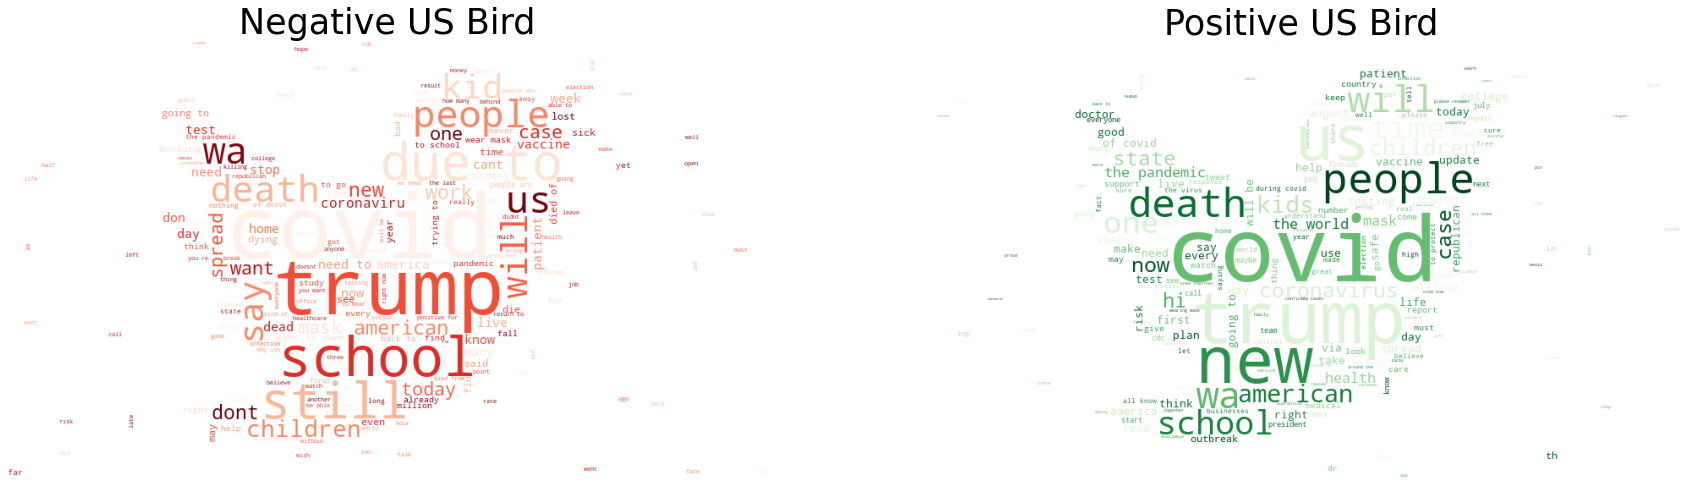

In [44]:
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=[30, 15])
wordcloud2 = WordCloud( background_color='white',mask=bird,colormap="Reds",
                        width=600,
                        height=400).generate(" ".join(pred_df[(pred_df['pred_sentiment']==0)&(pred_df['country']=='United States')]['text']))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative US Bird',fontsize=35);

wordcloud3 = WordCloud( background_color='white',mask=bird,colormap="Greens",
                        width=600,
                        height=400).generate(" ".join(pred_df[(pred_df['pred_sentiment']==1)&(pred_df['country']=='United States')]['text']))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Positive US Bird',fontsize=35);

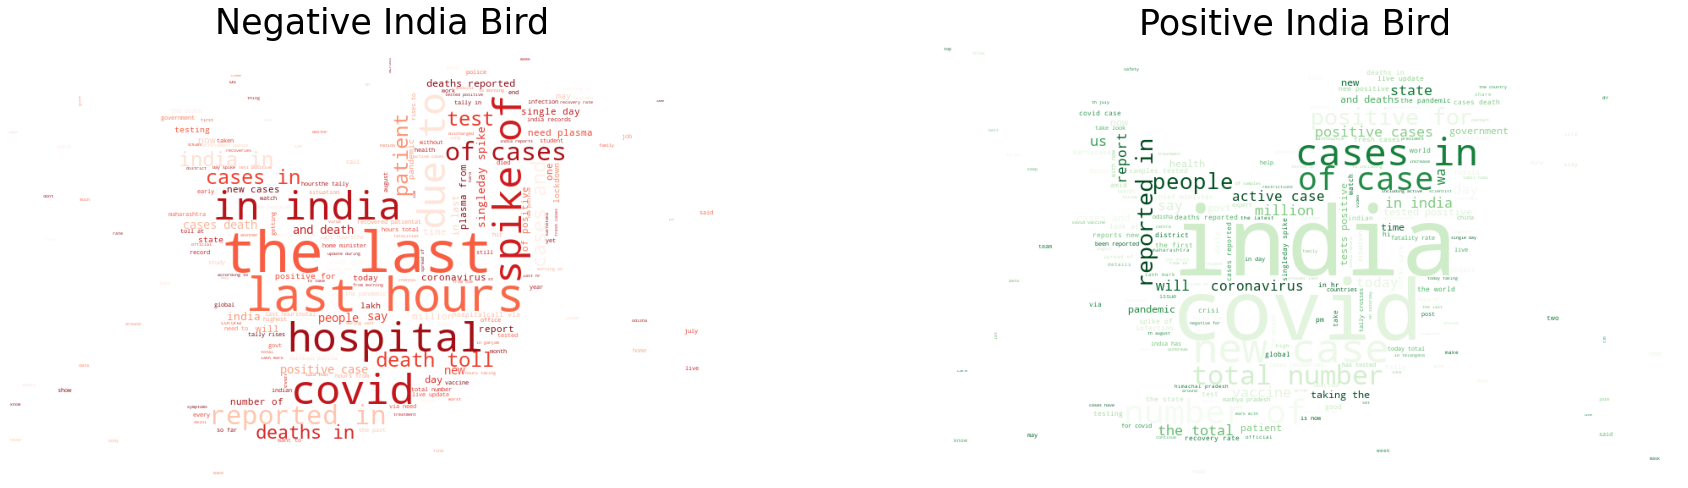

In [45]:
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=[30, 15])
wordcloud2 = WordCloud( background_color='white',mask=bird,colormap="Reds",
                        width=600,
                        height=400).generate(" ".join(pred_df[(pred_df['pred_sentiment']==0)&(pred_df['country']=='India')]['text']))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative India Bird ',fontsize=35);

wordcloud3 = WordCloud( background_color='white',mask=bird,colormap="Greens",
                        width=600,
                        height=400).generate(" ".join(pred_df[(pred_df['pred_sentiment']==1)&(pred_df['country']=='India')]['text']))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Positive India Bird ',fontsize=35);

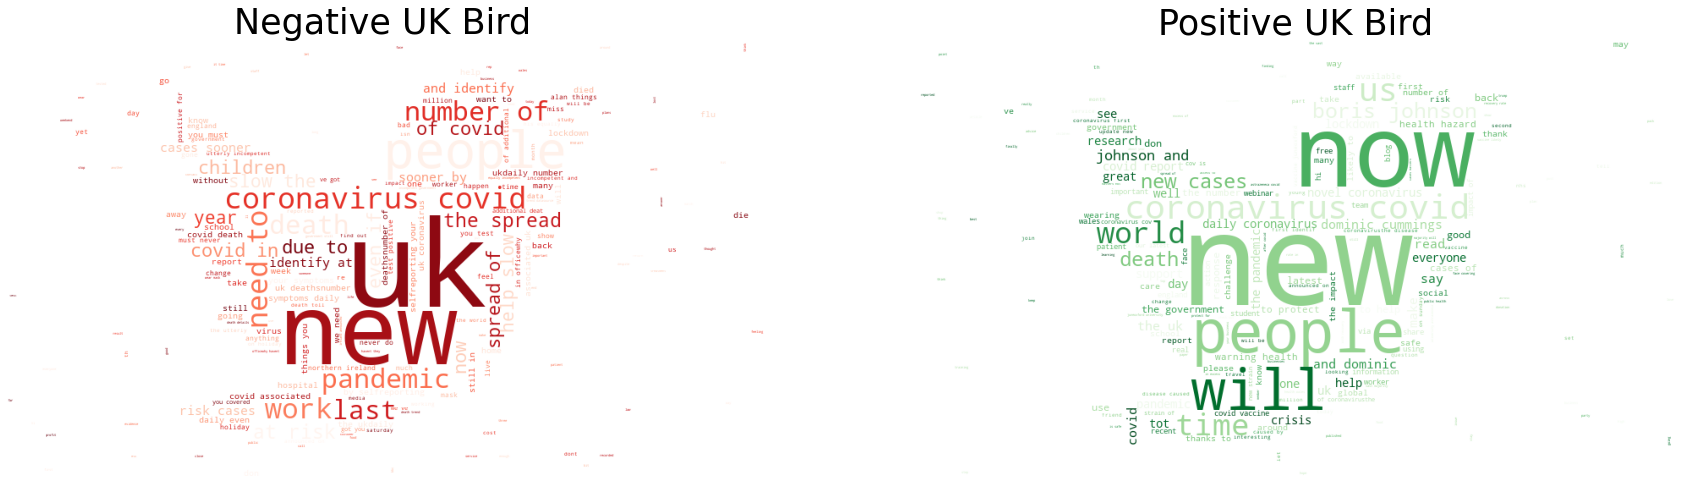

In [46]:
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=[30, 15])
wordcloud2 = WordCloud( background_color='white',mask=bird,colormap="Reds",
                        width=600,
                        height=400).generate(" ".join(pred_df[(pred_df['pred_sentiment']==0)&(pred_df['country']=='United Kingdom')]['text']))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative UK Bird ',fontsize=35);

wordcloud3 = WordCloud( background_color='white',mask=bird,colormap="Greens",
                        width=600,
                        height=400).generate(" ".join(pred_df[(pred_df['pred_sentiment']==1)&(pred_df['country']=='United Kingdom')]['text']))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Positive UK Bird ',fontsize=35);

<a id="17"></a>
<font size="+2" color="indigo"><b>17. Homework</b></font><br>

**In covid-19-nlp-text-classification we have 6 classes, but our model only predict two classes. So all you will re-build model for 6 classes and predict this dataset again.**

<a id="18"></a>
<font size="+2" color="indigo"><b>18. Vietnamese Sentiment Analyst</b></font><br>

In [47]:
vn_sentiment=pd.read_csv('../input/vietnamese-sentiment/data - data.csv',usecols=["comment","label"])

In [48]:
vn_sentiment.head(10)

comment label
0                      Áo bao đẹp ạ!!   POS
1                         Tuyệt vời !   POS
2          2day ao khong giong trong.   NEG
3         Mùi thơm,bôi lên da mềm da.   POS
4                   Vải đẹp, dày dặn.   POS
5     Hàng rất đẹp, rất chi là ưng ý.   POS
6  Chất lượng sản phẩm tốt, date dài.   POS
7      Ăn nói và thái độ phục vụ tốt.   POS
8        Đóng gói sản phẩm chắc chắn.   POS
9  tất sờn hết ca chưa dùng mà vay r.   NEG

In [49]:
category = vn_sentiment['label'].unique()
category_to_id = {cate: idx for idx, cate in enumerate(category)}
id_to_category = {idx: cate for idx, cate in enumerate(category)}
print(category_to_id)
print(id_to_category)

{'POS': 0, 'NEG': 1, 'NEU': 2}
{0: 'POS', 1: 'NEG', 2: 'NEU'}


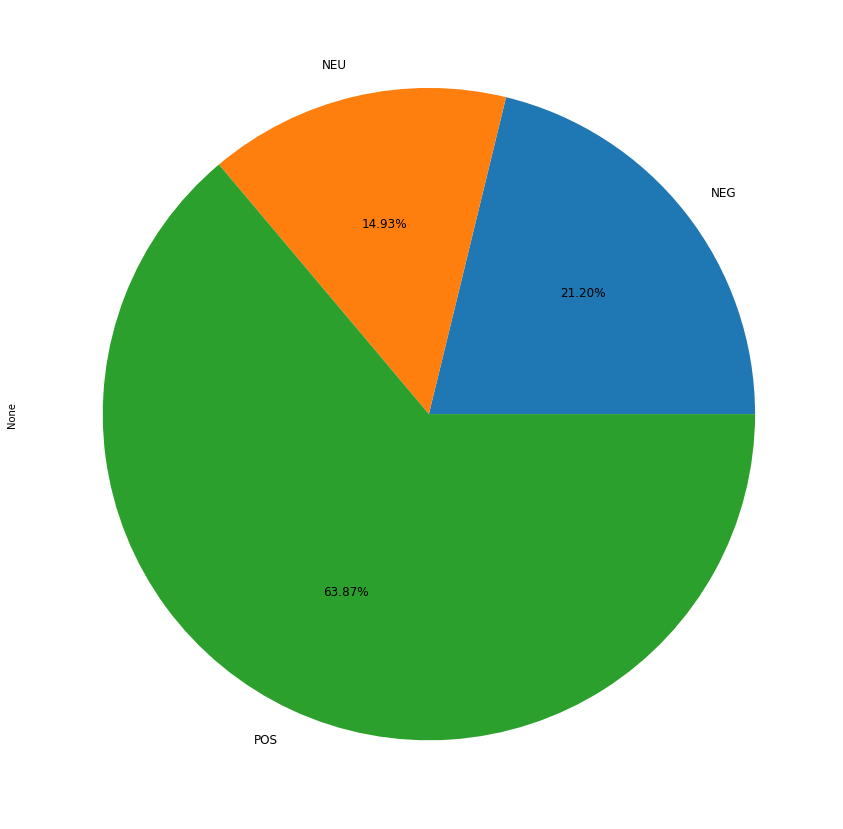

In [50]:
data_label = vn_sentiment['label']
data_label = pd.DataFrame(data_label, columns=['label']).groupby('label').size()
data_label.plot.pie(figsize=(15, 15), autopct="%.2f%%", fontsize=12)

In here we use transformer model to tokenize word

In [51]:
!pip install transformers

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In here, we have two options: bert and gpt pretrained model to tokenize word.

Read data

In [52]:
vn_sentiment.isnull().values.any()

vn_sentiment.shape

(31460, 2)

In [53]:
reviews = []
sentences = list(vn_sentiment['comment'])
for sen in sentences:
    reviews.append(sen)

In [54]:
reviews[10]

'Shop phục vụ rất tốt.'

In [55]:
vn_sentiment.label.unique()

array(['POS', 'NEG', 'NEU'], dtype=object)

In [56]:
vn_sentiment.label.head(10)

0    POS
1    POS
2    NEG
3    POS
4    POS
5    POS
6    POS
7    POS
8    POS
9    NEG
Name: label, dtype: object

In [57]:
y = vn_sentiment['label']

# NEU : 0 , POS : 1 , NEG : 2
y = np.array(list(map(lambda x: 1 if x=="POS" else (2 if x == "NEG" else 0 ), y)))

In [58]:
print(reviews[10],y[10])

Shop phục vụ rất tốt. 1


Import libaries

In [59]:
!pip install bert-for-tf2
!pip install sentencepiece
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

     |████████████████████████████████| 40 kB 347 kB/s eta 0:00:011
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.6-py3-none-any.whl size=30316 sha256=fe9c47dddb52aba3a708b02a4106f4e8eec4e351199a90f4f372d04c33f745e4
  Stored in directory: /root/.cache/pip/wheels/9a/8f/3a/8897e18a0b6e5050e9b04955ba4b3b142c167836f3dff1e097
  Created wheel for py-params: filename=py_params-0.9.7-py3-none-any.whl size=7302 sha256=d7261af5428ae692d0aea6ec652cf74f5fd092a669b474065dc4920acc8cf0af
  Stored in directory: /root/.cache/pip/wheels/47/3d/2d/bbffcfd6b9f4b8b5cbf07e7520ac2676192fe9431240c13ee8
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19473 sha256=c6b3547bf5bdc46fe9b032f234dbe6135c92a6cd5b006a11f61fc257b65f0338
  Stored in directory: /root/.cache/pip/wheels/0e/fc/d2/a44fff33af0f233d7def6e7de413006d57c10e10ad736fe8f5
Successfully built bert-for-tf2 py-params params-flow
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install 

### I used bert pretrained model to tokenize, you need use phobert to have a good performance

In [60]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [61]:
def tokenize_reviews(text_reviews):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_reviews))

In [62]:
tokenized_reviews = [tokenize_reviews(review) for review in reviews]

In [63]:
print(tokenized_reviews[10])

[4497, 6887, 14194, 24728, 9350, 2000, 2102, 1012]


In [64]:
import random 

reviews_with_len = [[review, y[i], len(review)]
                 for i, review in enumerate(tokenized_reviews)]
# Word Vector - Label - length of sequence.
print(reviews_with_len[0])

[[20118, 25945, 1102, 13699, 1037, 999, 999], 1, 7]


In [65]:
# Shuffle random dataset
random.shuffle(reviews_with_len)

In [66]:
reviews_with_len[0]

[[10722,
  2072,
  12731,
  2278,
  1102,
  13699,
  1010,
  11382,
  13765,
  4907,
  2290,
  24728,
  2050,
  6369,
  19817,
  5063,
  24728,
  2050,
  6187,
  9543,
  2232,
  1010,
  2433,
  12731,
  3070,
  6178,
  1047,
  19991,
  6887,
  4886,
  7221,
  21110,
  9530,
  1102,
  19098,
  2278,
  4497,
  1102,
  5063,
  2175,
  2072,
  9350,
  14684,
  1102,
  7113,
  1012],
 1,
 46]

Once the data is shuffled, we will sort the data by the length of the reviews. To do so, we will use the sort() function of the list and will tell it that we want to sort the list with respect to the third item in the sublist i.e. the length of the review.

In [67]:
#reviews_with_len.sort(key=lambda x: x[2])
sorted_reviews_labels = [(review_lab[0], review_lab[1]) for review_lab in reviews_with_len]
sorted_reviews_labels
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_reviews_labels, output_types=(tf.int32, tf.int32))

In [68]:
BATCH_SIZE = 32 # You can edit here i.e 128
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [69]:
next(iter(batched_dataset))

(<tf.Tensor: shape=(32, 63), dtype=int32, numpy=
 array([[10722,  2072, 12731, ...,     0,     0,     0],
        [23961, 12849, 16360, ...,     0,     0,     0],
        [27699,  2080,  6865, ...,     0,     0,     0],
        ...,
        [11834, 11320,  5063, ...,     0,     0,     0],
        [ 8957, 25175,  1012, ...,     0,     0,     0],
        [12731, 24209,  2050, ...,     0,     0,     0]], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
        0, 2, 2, 1, 2, 0, 1, 1, 0, 2], dtype=int32)>)

In [70]:
import math

TOTAL_BATCHES = math.ceil(len(sorted_reviews_labels) / BATCH_SIZE)
TEST_BATCHES = TOTAL_BATCHES // 10
batched_dataset.shuffle(TOTAL_BATCHES)
test_data = batched_dataset.take(TEST_BATCHES)
train_data = batched_dataset.skip(TEST_BATCHES)

### Build model, you need to re-build end-to end or using pretrained model as Bert, GPT-2

In [71]:
class TEXT_MODEL(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        
        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
        
        concatenated = tf.concat([l_1, l_2, l_3], axis=-1) # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output

In [72]:
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 3

DROPOUT_RATE = 0.2

NB_EPOCHS = 5

In [73]:
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)


In [74]:
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# es = EarlyStopping(monitor='val_f1_m', mode='max', verbose=1, patience=5)
# reduce_lr = ReduceLROnPlateau(monitor='val_f1_m', factor=0.2, patience=8, min_lr=1e7)
# checkpoint = ModelCheckpoint('best_full.h5', monitor='val_f1_m', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [75]:
if OUTPUT_CLASSES == 2:
    text_model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])
else:
    text_model.compile(loss="sparse_categorical_crossentropy",
                       optimizer="adam",
                       metrics=["sparse_categorical_accuracy"])

In [76]:
history = text_model.fit(train_data,validation_data=test_data, epochs=2)

Epoch 1/2
886/886 [==============================] - 80s 91ms/step - loss: 0.5684 - sparse_categorical_accuracy: 0.7699 - val_loss: 0.5413 - val_sparse_categorical_accuracy: 0.7790
Epoch 2/2
886/886 [==============================] - 50s 56ms/step - loss: 0.4904 - sparse_categorical_accuracy: 0.8032 - val_loss: 0.5464 - val_sparse_categorical_accuracy: 0.7765


### Visualization 
You can put a loss visualization in here

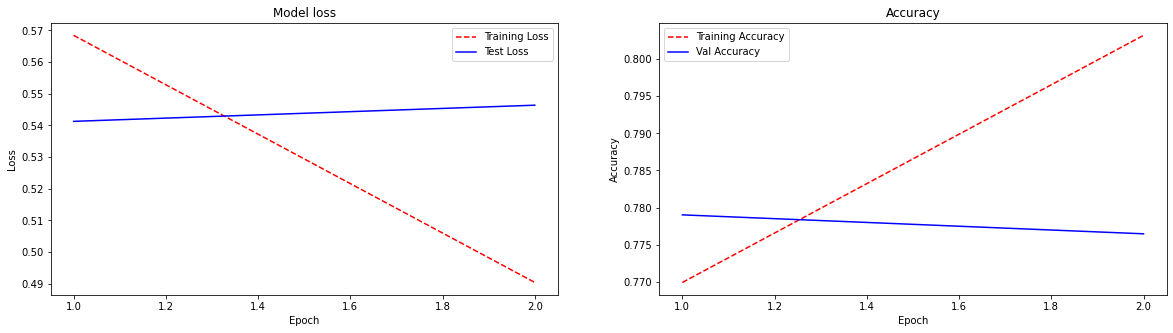

In [77]:
plt.figure(figsize=(20, 5))

plt.subplot(121)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.title('Model loss')

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Pylot iou-score 
plt.subplot(122)

# Get training and test loss histories
training_loss = history.history['sparse_categorical_accuracy']
test_loss = history.history['val_sparse_categorical_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.title('Accuracy')
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

### Predict

In [78]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = tokenize_reviews(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = text_model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [79]:
sample_pred_text = ('Bớt đùa đi, dạo này tao không còn vui tính như trước đâu.')

predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[0.21199441 0.05412339 0.7338822 ]]
